In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from fbprophet import Prophet

In [4]:
files = pd.DataFrame()

for filename in os.listdir("tickerData"):
    if filename.endswith(".txt"):
        x = pd.read_csv("tickerData/"+filename)
        x.columns = [y.replace(" ", "") for y in x.columns]
        x['TICKER'] = filename[:-4]
        files = pd.concat([files,x], ignore_index=True)

In [5]:
files['DATE']  = pd.to_datetime(files['DATE'].astype('str'), format = "%Y/%m/%d")

In [7]:
files1 = files[files['TICKER'] == 'F_S'] 

In [14]:
files1_close = files1.filter(['DATE', 'CLOSE'], axis = 1)

In [18]:
files1_close.columns = ['ds', 'y']

In [19]:
m = Prophet(
    growth="linear",
    #holidays=holidays,
    #seasonality_mode="multiplicative",
    changepoint_prior_scale=30,
    seasonality_prior_scale=35,
    ###cap=3.00,
    ###floor=.65*125,
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    ).add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=55
    ).add_seasonality(
        name='daily',
        period=1,
        fourier_order=15
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20
    ).add_seasonality(
        name='quarterly',
        period=365.25/4,
        fourier_order=5,
        prior_scale=15)
m.fit(files1_close)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [21]:
predper = 60
future = m.make_future_dataframe(periods=predper)
future.tail()

,ds
7920,2021-05-25
7921,2021-05-26
7922,2021-05-27
7923,2021-05-28
7924,2021-05-29


In [22]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


,ds,yhat,yhat_lower,yhat_upper
7920,2021-05-25,50974.993952,45458.783786,56731.965966
7921,2021-05-26,51136.038510,45780.724343,56462.494348
7922,2021-05-27,50943.111009,44934.535708,56187.651919
7923,2021-05-28,50561.028928,44956.991686,56157.025797
7924,2021-05-29,50465.212035,45116.578084,55977.437189


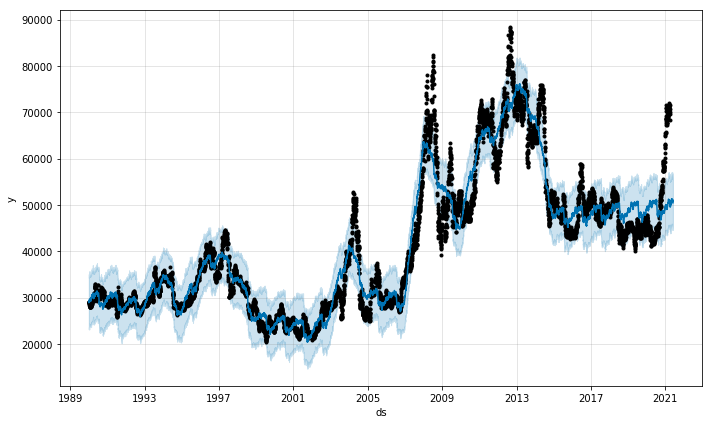

In [23]:
pd.plotting.register_matplotlib_converters()
fig1 = m.plot(forecast)